In [546]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from flask import Flask, request, jsonify

In [547]:
df = pd.read_csv('Oscars.csv', encoding='latin-1')
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


In [548]:
df.shape

(441, 27)

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _unit_id                       441 non-null    int64  
 1   _golden                        441 non-null    bool   
 2   _unit_state                    441 non-null    object 
 3   _trusted_judgments             441 non-null    int64  
 4   _last_judgment_at              416 non-null    object 
 5   birthplace                     441 non-null    object 
 6   birthplace:confidence          441 non-null    float64
 7   date_of_birth                  441 non-null    object 
 8   date_of_birth:confidence       441 non-null    float64
 9   race_ethnicity                 441 non-null    object 
 10  race_ethnicity:confidence      441 non-null    float64
 11  religion                       441 non-null    object 
 12  religion:confidence            441 non-null    flo

In [550]:
df.isnull().sum()

_unit_id                           0
_golden                            0
_unit_state                        0
_trusted_judgments                 0
_last_judgment_at                 25
birthplace                         0
birthplace:confidence              0
date_of_birth                      0
date_of_birth:confidence           0
race_ethnicity                     0
race_ethnicity:confidence          0
religion                           0
religion:confidence                0
sexual_orientation                 0
sexual_orientation:confidence      0
year_of_award                      0
year_of_award:confidence           0
award                              0
biourl                             0
birthplace_gold                  432
date_of_birth_gold               433
movie                              0
person                             0
race_ethnicity_gold              439
religion_gold                    431
sexual_orientation_gold          438
year_of_award_gold               430
d

In [551]:
df['_unit_state'].unique()

array(['finalized', 'golden'], dtype=object)

In [552]:
columnas_a_eliminar = ['_unit_id', '_unit_state',  '_last_judgment_at', 'biourl', 'birthplace_gold', 'date_of_birth_gold', 'movie', 'person', 
          'race_ethnicity_gold', 'religion_gold', 'sexual_orientation_gold', 'year_of_award_gold']

df.drop(columnas_a_eliminar, axis=1, inplace=True)
df

,_golden,_trusted_judgments,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award
0,False,3,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director
1,False,3,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director
2,False,3,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director
3,False,3,"Chicago, Il",1.0,23-Feb-1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director
4,False,3,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,False,3,"London, England",1.0,7-Mar-71,1.0,White,1.0,Jewish,1.0,Straight,1.0000,2006,0.6857,Best Supporting Actress
437,False,3,"Manchester, England",1.0,20-Oct-56,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,2009,1.0000,Best Director
438,False,3,"Chicago, Il",1.0,26-Jul-22,1.0,White,1.0,Na,1.0,Straight,1.0000,1977,1.0000,Best Supporting Actor
439,False,3,"Laurel, Ne",1.0,31-Aug-28,1.0,White,1.0,Na,1.0,Straight,1.0000,1999,1.0000,Best Supporting Actor


In [553]:
df.head()

,_golden,_trusted_judgments,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award
0,False,3,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director
1,False,3,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director
2,False,3,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director
3,False,3,"Chicago, Il",1.0,23-Feb-1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director
4,False,3,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director


In [554]:
df.shape

(441, 15)

In [557]:
# Columna de fechas en formatos "18-May-1897" o "14-Jan-63"
columna_fecha = 'date_of_birth'

# Función para transformar la fecha
def transformar_fecha(fecha_str):
    partes = fecha_str.split('-')
    if len(partes) == 3:
        if len(partes[2]) == 2:
            año = int(partes[2])
            if 28 <= año <= 99:
                return f"19{año:02}"
            else:
                return f"20{año:02}"
        else:
            return partes[2]
    else:
        return fecha_str

# Aplica la función a la columna de fechas y crea una nueva columna 'anio'
df['date_of_birth_'] = df[columna_fecha].apply(transformar_fecha)


In [555]:
df

,_golden,_trusted_judgments,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award
0,False,3,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director
1,False,3,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director
2,False,3,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director
3,False,3,"Chicago, Il",1.0,23-Feb-1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director
4,False,3,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,False,3,"London, England",1.0,7-Mar-71,1.0,White,1.0,Jewish,1.0,Straight,1.0000,2006,0.6857,Best Supporting Actress
437,False,3,"Manchester, England",1.0,20-Oct-56,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,2009,1.0000,Best Director
438,False,3,"Chicago, Il",1.0,26-Jul-22,1.0,White,1.0,Na,1.0,Straight,1.0000,1977,1.0000,Best Supporting Actor
439,False,3,"Laurel, Ne",1.0,31-Aug-28,1.0,White,1.0,Na,1.0,Straight,1.0000,1999,1.0000,Best Supporting Actor


In [558]:
# Columnas de fechas originales y transformadas
columna_original = 'date_of_birth'
columna_nueva = 'date_of_birth_'

# Reemplaza la columna original con la nueva
df[columna_original] = df[columna_nueva]

# Elimina la columna nueva si ya no la necesitas
df = df.drop(columns=[columna_nueva])

# Imprime el DataFrame con la columna reemplazada
df

,_golden,_trusted_judgments,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award
0,False,3,"Chisinau, Moldova",1.0,1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director
1,False,3,"Glasgow, Scotland",1.0,1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director
2,False,3,"Chisinau, Moldova",1.0,1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director
3,False,3,"Chicago, Il",1.0,1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director
4,False,3,"Salt Lake City, Ut",1.0,1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,False,3,"London, England",1.0,1971,1.0,White,1.0,Jewish,1.0,Straight,1.0000,2006,0.6857,Best Supporting Actress
437,False,3,"Manchester, England",1.0,1956,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,2009,1.0000,Best Director
438,False,3,"Chicago, Il",1.0,2022,1.0,White,1.0,Na,1.0,Straight,1.0000,1977,1.0000,Best Supporting Actor
439,False,3,"Laurel, Ne",1.0,1928,1.0,White,1.0,Na,1.0,Straight,1.0000,1999,1.0000,Best Supporting Actor


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _golden                        441 non-null    bool   
 1   _trusted_judgments             441 non-null    int64  
 2   birthplace                     441 non-null    object 
 3   birthplace:confidence          441 non-null    float64
 4   date_of_birth                  441 non-null    object 
 5   date_of_birth:confidence       441 non-null    float64
 6   race_ethnicity                 441 non-null    object 
 7   race_ethnicity:confidence      441 non-null    float64
 8   religion                       441 non-null    object 
 9   religion:confidence            441 non-null    float64
 10  sexual_orientation             441 non-null    object 
 11  sexual_orientation:confidence  441 non-null    float64
 12  year_of_award                  441 non-null    int

In [560]:
# Columna que contiene ciudades y países
columna_birthplace = 'birthplace'

# Función para extraer la ciudad
def obtener_ciudad(birthplace):
    partes = birthplace.split(', ')
    return partes[0]

# Aplica la función y crea una nueva columna 'birthplace_'
df['birthplace_city'] = df[columna_birthplace].apply(obtener_ciudad)

df

,_golden,_trusted_judgments,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,birthplace_city
0,False,3,"Chisinau, Moldova",1.0,1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director,Chisinau
1,False,3,"Glasgow, Scotland",1.0,1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director,Glasgow
2,False,3,"Chisinau, Moldova",1.0,1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director,Chisinau
3,False,3,"Chicago, Il",1.0,1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director,Chicago
4,False,3,"Salt Lake City, Ut",1.0,1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director,Salt Lake City
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,False,3,"London, England",1.0,1971,1.0,White,1.0,Jewish,1.0,Straight,1.0000,2006,0.6857,Best Supporting Actress,London
437,False,3,"Manchester, England",1.0,1956,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,2009,1.0000,Best Director,Manchester
438,False,3,"Chicago, Il",1.0,2022,1.0,White,1.0,Na,1.0,Straight,1.0000,1977,1.0000,Best Supporting Actor,Chicago
439,False,3,"Laurel, Ne",1.0,1928,1.0,White,1.0,Na,1.0,Straight,1.0000,1999,1.0000,Best Supporting Actor,Laurel


In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   _golden                        441 non-null    bool   
 1   _trusted_judgments             441 non-null    int64  
 2   birthplace                     441 non-null    object 
 3   birthplace:confidence          441 non-null    float64
 4   date_of_birth                  441 non-null    object 
 5   date_of_birth:confidence       441 non-null    float64
 6   race_ethnicity                 441 non-null    object 
 7   race_ethnicity:confidence      441 non-null    float64
 8   religion                       441 non-null    object 
 9   religion:confidence            441 non-null    float64
 10  sexual_orientation             441 non-null    object 
 11  sexual_orientation:confidence  441 non-null    float64
 12  year_of_award                  441 non-null    int

In [562]:
df['date_of_birth'] = df['date_of_birth'].replace('1936 [1]', '1936')

In [516]:

# Contar la cantidad de valores True y False en la columna _golden
conteo = df['_golden'].value_counts()

print(conteo)

_golden
False    416
True      25
Name: count, dtype: int64


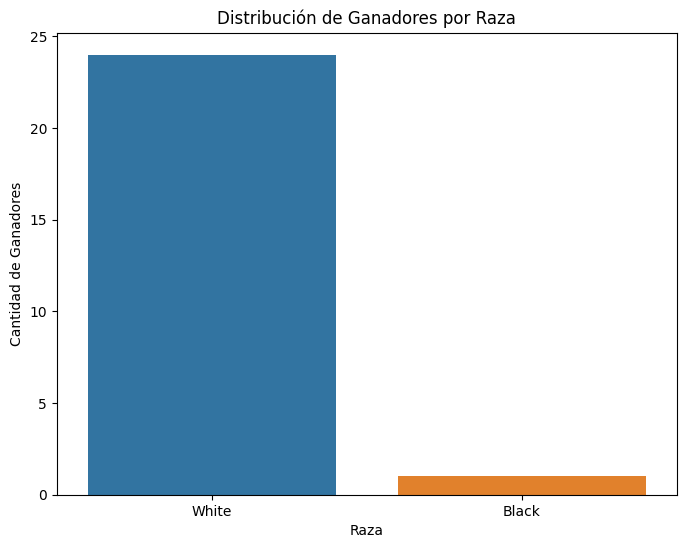

In [564]:
# Filtrar los datos para obtener solo los ganadores
df_ganadores = df[df['_golden'] == True]

# Crear un gráfico de barras para los ganadores
plt.figure(figsize=(8, 6))
sns.countplot(x='race_ethnicity', data=df_ganadores)
plt.title('Distribución de Ganadores por Raza')
plt.xlabel('Raza')
plt.ylabel('Cantidad de Ganadores')
plt.show()

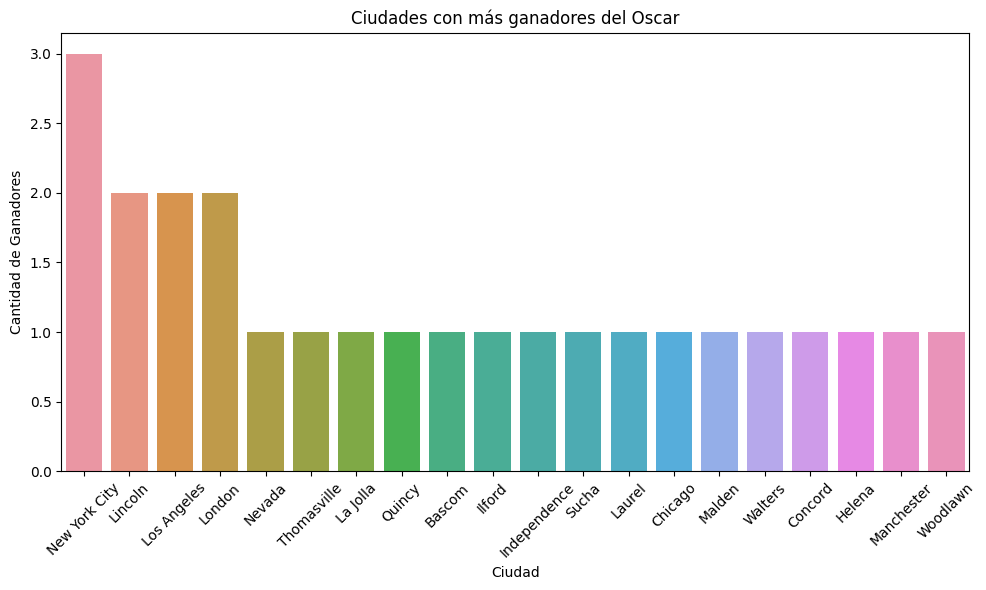

In [519]:
# Filtrar los datos para obtener solo los ganadores
df_ganadores = df[df['_golden'] == True]

# Contar la cantidad de ganadores por ciudad
ciudades_ganadores = df_ganadores['birthplace_city'].value_counts()

# Crear un gráfico de barras para las ciudades con más ganadores
plt.figure(figsize=(10, 6))
sns.barplot(x=ciudades_ganadores.index, y=ciudades_ganadores.values)
plt.title('Ciudades con más ganadores del Oscar')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Ganadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


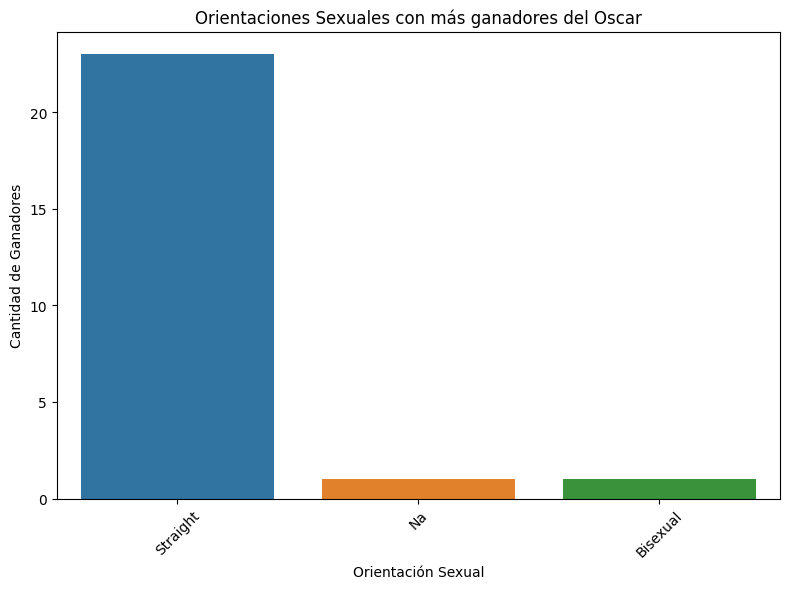

In [520]:
# Contar la cantidad de ganadores por orientación sexual
orientaciones_ganadores = df_ganadores['sexual_orientation'].value_counts()

# Crear un gráfico de barras para las orientaciones sexuales con más ganadores
plt.figure(figsize=(8, 6))
sns.barplot(x=orientaciones_ganadores.index, y=orientaciones_ganadores.values)
plt.title('Orientaciones Sexuales con más ganadores del Oscar')
plt.xlabel('Orientación Sexual')
plt.ylabel('Cantidad de Ganadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

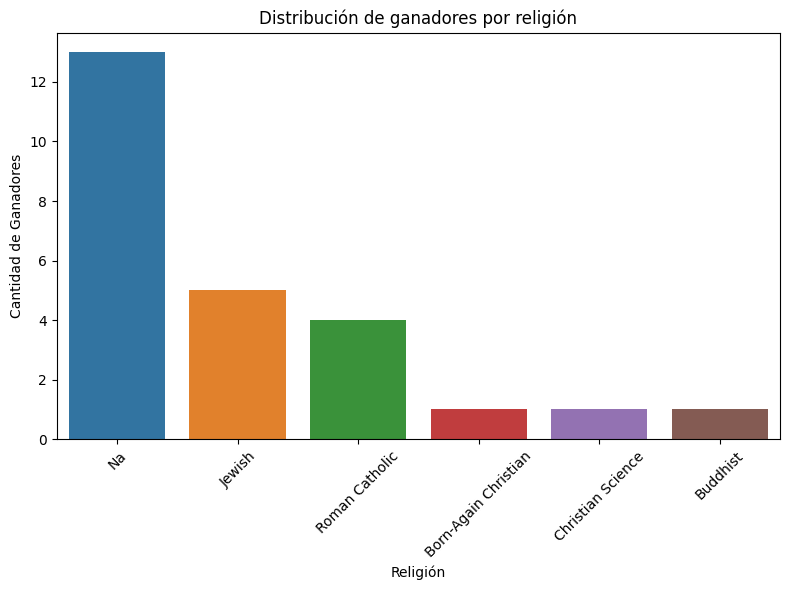

In [521]:
# Crear un gráfico de barras o de pastel
plt.figure(figsize=(8, 6))
sns.countplot(x='religion', data=df_ganadores)
plt.title('Distribución de ganadores por religión')
plt.xlabel('Religión')
plt.ylabel('Cantidad de Ganadores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [522]:
df['award'].unique()

array(['Best Director', 'Best Actor', 'Best Supporting Actor',
       'Best Actress', 'Best Supporting Actress'], dtype=object)

In [565]:
df.head()

,_golden,_trusted_judgments,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,race_ethnicity:confidence,religion,religion:confidence,sexual_orientation,sexual_orientation:confidence,year_of_award,year_of_award:confidence,award,birthplace_city
0,False,3,"Chisinau, Moldova",1.0,1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1927,1.0000,Best Director,Chisinau
1,False,3,"Glasgow, Scotland",1.0,1886,1.0,White,1.0,Na,1.0,Straight,0.6842,1930,1.0000,Best Director,Glasgow
2,False,3,"Chisinau, Moldova",1.0,1895,1.0,White,1.0,Na,1.0,Straight,1.0000,1931,0.6667,Best Director,Chisinau
3,False,3,"Chicago, Il",1.0,1899,1.0,White,1.0,Na,1.0,Straight,1.0000,1932,1.0000,Best Director,Chicago
4,False,3,"Salt Lake City, Ut",1.0,1894,1.0,White,1.0,Roman Catholic,1.0,Straight,1.0000,1933,1.0000,Best Director,Salt Lake City


In [566]:
# Seleccionar las columnas categóricas a codificar
columnas_categoricas = ['birthplace', 'race_ethnicity', 'religion', 'sexual_orientation', 'award', 'birthplace_city']

# Realizar el One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=columnas_categoricas)

df_encoded.head()


,_golden,_trusted_judgments,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,...,birthplace_city_Wiesbaden,birthplace_city_Wilkes-Barre,birthplace_city_Winchester,birthplace_city_Winnipeg,birthplace_city_Winterset,birthplace_city_Wise,birthplace_city_Withington,birthplace_city_Woodlawn,birthplace_city_Yonkers,birthplace_city_York
0,False,3,1.0,1895,1.0,1.0,1.0,1.0000,1927,1.0000,...,False,False,False,False,False,False,False,False,False,False
1,False,3,1.0,1886,1.0,1.0,1.0,0.6842,1930,1.0000,...,False,False,False,False,False,False,False,False,False,False
2,False,3,1.0,1895,1.0,1.0,1.0,1.0000,1931,0.6667,...,False,False,False,False,False,False,False,False,False,False
3,False,3,1.0,1899,1.0,1.0,1.0,1.0000,1932,1.0000,...,False,False,False,False,False,False,False,False,False,False
4,False,3,1.0,1894,1.0,1.0,1.0,1.0000,1933,1.0000,...,False,False,False,False,False,False,False,False,False,False


In [567]:
df_encoded['date_of_birth'] = df_encoded['date_of_birth'].astype(float) 
df_encoded['year_of_award'] = df_encoded['year_of_award'].astype(float) 


In [568]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Columns: 510 entries, _golden to birthplace_city_York
dtypes: bool(501), float64(8), int64(1)
memory usage: 246.9 KB


In [569]:
# Separar características y etiquetas

X = df_encoded.drop('_golden', axis=1)
y = df_encoded['_golden']

X


,_trusted_judgments,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,"birthplace_Arlington, Va",...,birthplace_city_Wiesbaden,birthplace_city_Wilkes-Barre,birthplace_city_Winchester,birthplace_city_Winnipeg,birthplace_city_Winterset,birthplace_city_Wise,birthplace_city_Withington,birthplace_city_Woodlawn,birthplace_city_Yonkers,birthplace_city_York
0,3,1.0,1895.0,1.0,1.0,1.0,1.0000,1927.0,1.0000,False,...,False,False,False,False,False,False,False,False,False,False
1,3,1.0,1886.0,1.0,1.0,1.0,0.6842,1930.0,1.0000,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,1895.0,1.0,1.0,1.0,1.0000,1931.0,0.6667,False,...,False,False,False,False,False,False,False,False,False,False
3,3,1.0,1899.0,1.0,1.0,1.0,1.0000,1932.0,1.0000,False,...,False,False,False,False,False,False,False,False,False,False
4,3,1.0,1894.0,1.0,1.0,1.0,1.0000,1933.0,1.0000,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,3,1.0,1971.0,1.0,1.0,1.0,1.0000,2006.0,0.6857,False,...,False,False,False,False,False,False,False,False,False,False
437,3,1.0,1956.0,1.0,1.0,1.0,1.0000,2009.0,1.0000,False,...,False,False,False,False,False,False,False,False,False,False
438,3,1.0,2022.0,1.0,1.0,1.0,1.0000,1977.0,1.0000,False,...,False,False,False,False,False,False,False,False,False,False
439,3,1.0,1928.0,1.0,1.0,1.0,1.0000,1999.0,1.0000,False,...,False,False,False,False,False,False,False,False,False,False


In [570]:
 # Se estandarizan
scaler = MinMaxScaler()
transformados = scaler.fit_transform(X)
transformados

array([[0.        , 1.        , 0.16981132, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.11320755, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.16981132, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.96855346, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.37735849, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.86792453, ..., 0.        , 0.        ,
        0.        ]])

In [571]:
transformado = pd.DataFrame(transformados)
transformado.columns = X.columns
transformado.describe() 

,_trusted_judgments,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,"birthplace_Arlington, Va",...,birthplace_city_Wiesbaden,birthplace_city_Wilkes-Barre,birthplace_city_Winchester,birthplace_city_Winnipeg,birthplace_city_Winterset,birthplace_city_Wise,birthplace_city_Withington,birthplace_city_Woodlawn,birthplace_city_Yonkers,birthplace_city_York
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,0.050404,0.986175,0.583822,0.990130,0.997464,0.984061,0.977808,0.530638,0.985124,0.002268,...,0.002268,0.004535,0.004535,0.002268,0.002268,0.002268,0.002268,0.004535,0.002268,0.002268
std,0.206691,0.113495,0.275108,0.093251,0.047939,0.098410,0.144234,0.276217,0.088762,0.047619,...,0.047619,0.067267,0.067267,0.047619,0.047619,0.047619,0.047619,0.067267,0.047619,0.047619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.415094,1.000000,1.000000,1.000000,1.000000,0.298851,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.553459,1.000000,1.000000,1.000000,1.000000,0.528736,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.874214,1.000000,1.000000,1.000000,1.000000,0.770115,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [572]:
#Prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,_trusted_judgments,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,"birthplace_Arlington, Va",...,birthplace_city_Wiesbaden,birthplace_city_Wilkes-Barre,birthplace_city_Winchester,birthplace_city_Winnipeg,birthplace_city_Winterset,birthplace_city_Wise,birthplace_city_Withington,birthplace_city_Woodlawn,birthplace_city_Yonkers,birthplace_city_York
66,3,1.0,1930.0,1.0,1.0,1.0000,1.0,1993.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
353,3,1.0,2022.0,1.0,1.0,0.6897,1.0,1952.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
239,3,1.0,1951.0,1.0,1.0,1.0000,1.0,2003.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
31,3,1.0,1903.0,1.0,1.0,1.0000,1.0,1959.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
84,3,1.0,1972.0,1.0,1.0,1.0000,1.0,2011.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,1.0,1891.0,1.0,1.0,1.0000,1.0,1948.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
270,3,1.0,2013.0,1.0,1.0,1.0000,1.0,1948.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
348,3,1.0,2023.0,1.0,1.0,1.0000,1.0,1947.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False
435,3,1.0,1934.0,1.0,1.0,1.0000,1.0,1970.0,1.0,False,...,False,False,False,False,False,False,False,False,False,False


In [573]:
# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[0.        , 1.        , 0.38993711, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.37735849, ..., 0.        , 0.        ,
        0.        ],
       [0.88043478, 1.        , 0.55345912, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.85534591, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.94339623, ..., 0.        , 0.        ,
        0.        ]])

In [574]:
transformado = pd.DataFrame(transformados)
transformado.columns = X.columns
transformado.describe()

,_trusted_judgments,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity:confidence,religion:confidence,sexual_orientation:confidence,year_of_award,year_of_award:confidence,"birthplace_Arlington, Va",...,birthplace_city_Wiesbaden,birthplace_city_Wilkes-Barre,birthplace_city_Winchester,birthplace_city_Winnipeg,birthplace_city_Winterset,birthplace_city_Wise,birthplace_city_Withington,birthplace_city_Woodlawn,birthplace_city_Yonkers,birthplace_city_York
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,...,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,0.050404,0.986175,0.583822,0.990130,0.997464,0.984061,0.977808,0.530638,0.985124,0.002268,...,0.002268,0.004535,0.004535,0.002268,0.002268,0.002268,0.002268,0.004535,0.002268,0.002268
std,0.206691,0.113495,0.275108,0.093251,0.047939,0.098410,0.144234,0.276217,0.088762,0.047619,...,0.047619,0.067267,0.067267,0.047619,0.047619,0.047619,0.047619,0.067267,0.047619,0.047619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.415094,1.000000,1.000000,1.000000,1.000000,0.298851,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.553459,1.000000,1.000000,1.000000,1.000000,0.528736,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.874214,1.000000,1.000000,1.000000,1.000000,0.770115,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [575]:
# Entrenar el modelo
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [576]:
# Predecir y evaluar
y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [577]:
# Mostrar resultados
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9662921348314607
Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98        85
        True       1.00      0.25      0.40         4

    accuracy                           0.97        89
   macro avg       0.98      0.62      0.69        89
weighted avg       0.97      0.97      0.96        89



In [ ]:
#Tunnig

In [578]:
# Dividimos el conjunto de datos en conjunto de entrenamiento y de test:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

In [579]:
# Creamos un pipeline que escale los datos y aplique el algoritmo KNN:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])

In [580]:
# Establecemos los hiperparámetros a buscar en la búsqueda en rejilla:
params = [{'knn__n_neighbors': [3, 5, 7, 9],
           'knn__weights': ['uniform', 'distance'],
           'knn__leaf_size': [15, 20]}]

In [581]:
# Creamos un objeto de búsqueda en rejilla utilizando el pipeline y los hiperparámetros:
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

# Entrenamos la búsqueda en rejilla para el conjunto de entrenamiento:
gs_knn.fit(X_train, y_train)

# Imprimimos los mejores hiperparámetros encontrados:
gs_knn.best_params_


{'knn__leaf_size': 15, 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

In [582]:
# Generamos el score de los hiperparámetros encontrados:
gs_knn.score(X_train, y_train)

0.9772727272727273

In [583]:
# Ahora mostramos el mejor estimador:
gs_knn.best_estimator_

Pipeline(steps=[('mms', MinMaxScaler()),
                ('knn', KNeighborsClassifier(leaf_size=15, n_neighbors=3))])

In [589]:
# Generamos la matriz de confusión:
grid_predictions = gs_knn.predict(X_test)
matriz = confusion_matrix(y_test, grid_predictions)

print(matriz)

[[291   0]
 [ 14   4]]


<Axes: >

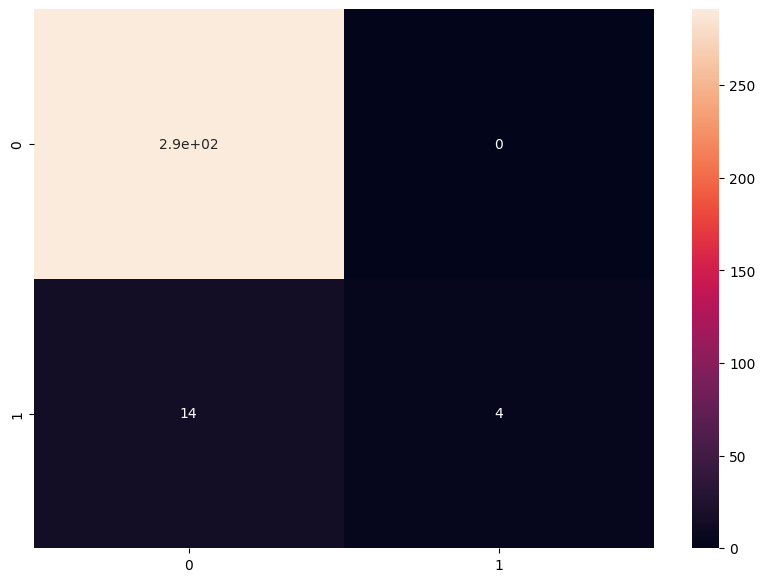

In [590]:
# Imprimimos la gráfica con la matriz de confusión:
plt.figure(figsize = (10,7))
sn.heatmap(matriz, annot=True)

In [586]:
# Reporte de clasificación:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

       False       0.95      1.00      0.98       291
        True       1.00      0.22      0.36        18

    accuracy                           0.95       309
   macro avg       0.98      0.61      0.67       309
weighted avg       0.96      0.95      0.94       309



In [ ]:
#Ensamble

In [593]:
model2 = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                           n_estimators= 500,
                           random_state= 19).fit(X_train, y_train)

c:\Users\carlo\OneDrive\Documentos\Ucamp\Proyecto final\myvenv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [594]:
model2_predict = model2.predict(X_test)
print('El Accuracy usando Bagging con KNN es de: {}'.format(accuracy_score(model2_predict, y_test)))

El Accuracy usando Bagging con KNN es de: 0.9967637540453075


In [595]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier().fit(X_train, y_train)
model3_predict = model3.predict(X_test)
print('El Accuracy usando Decition Tree es de: {}'.format(accuracy_score(model3_predict, y_test)))

model4 = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                           n_estimators= 100,
                           random_state= 19).fit(X_train, y_train)
model4_predict = model4.predict(X_test)
print('El Accuracy usando Bagging con Decition Tree es de: {}'.format(accuracy_score(model4_predict, y_test)))

El Accuracy usando Decition Tree es de: 1.0


c:\Users\carlo\OneDrive\Documentos\Ucamp\Proyecto final\myvenv\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


El Accuracy usando Bagging con Decition Tree es de: 1.0
